# Initialization

In [1]:
%matplotlib inline

import random
import math
import matplotlib.pyplot as plt
from collections import Counter

# Continuous Distributions

- probability density function (pdf)
    - The probability of seeing a value in a certain interval equals the integral of the density function over the interval.
- cumulative distribution function (cdf)

## Uniform Distribution

In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0:
        return 0 # uniform random is never less than 0
    elif x < 1:
        return x # e.g. P(X <= 0.4) = 0.4
    else:
        return 1 # uniform random is always less than 1

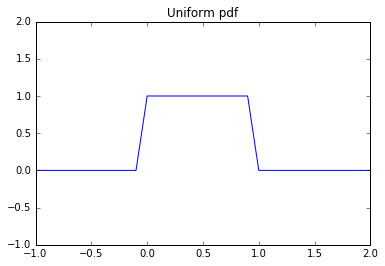

In [3]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [uniform_pdf(x) for x in xs], '-')
plt.axis([-1, 2, -1, 2])
plt.title("Uniform pdf")
plt.show()

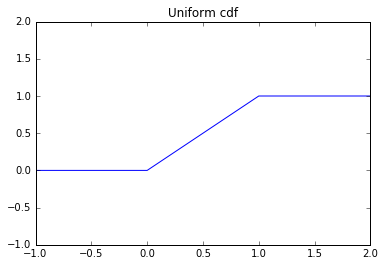

In [4]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [uniform_cdf(x) for x in xs], '-')
plt.axis([-1, 2, -1, 2])
plt.title("Uniform cdf")
plt.show()

## Normal Distribution

pdf: $$ f(x,\mu) = \frac {1} {\sqrt {2 \pi} \sigma} exp(- \frac {{x-\mu}^2} {2 \sigma^2})$$

cdf: $$ \frac {1} {2} [1+erf(\frac {x-\mu} {\sigma \sqrt{2}})]$$

In [5]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

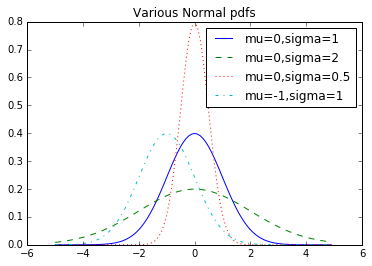

In [6]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

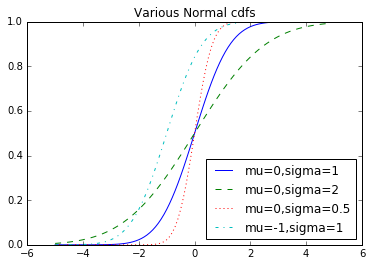

In [7]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [8]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

In [9]:
# Find z for certian probability
inverse_normal_cdf(0.97)

1.880788803100586

# Discrete distributions

## Bernouli

In [10]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [11]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

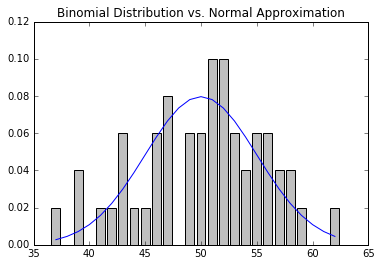

In [12]:
make_hist(.5, 100, 50)

# Further Exploration (scipy.stats)

- [Document](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

In [13]:
import scipy.stats